<a href="https://colab.research.google.com/github/rayford295/RS2SVI/blob/main/11_29_RS2SVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

# 这里改成你在 Drive 里的真实路径（重点！）
# 比如：/content/drive/MyDrive/Dataset/CVIAN_reorganized
RAW_DATA_ROOT = "/content/drive/MyDrive/Manuscript_Ph.D./3rd_DisasterMind AI agent (organization）/Dataset/CVIAN_reorganized"


WORK_DIR = "/content/sat2street_data"
IMG_DIR  = f"{WORK_DIR}/images"
PAIRS_CSV = f"{WORK_DIR}/pairs.csv"

import os
os.makedirs(IMG_DIR, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!ls "/content/drive/MyDrive/Manuscript_Ph.D./3rd_DisasterMind AI agent (organization）/Dataset"

 CVIAN_reorganized	       SVI_IncidentsDataset
'pre and post SVI(50-50-50)'   SVI_PalisadesFireImages
 RSI_BRIGHT_sampled_50	      'SVI & RSI_CVIAN_selected_50'


In [15]:
import os
import shutil
import csv

severities = ["0_MinorDamage", "1_ModerateDamage", "2_SevereDamage"]

rows = []
idx = 0

for sev in severities:
    sev_dir = os.path.join(RAW_DATA_ROOT, sev)
    if not os.path.isdir(sev_dir):
        continue

    for folder in sorted(os.listdir(sev_dir)):
        folder_path = os.path.join(sev_dir, folder)
        if not os.path.isdir(folder_path):
            continue

        files = os.listdir(folder_path)
        sat_files = [f for f in files if "Satellite" in f]
        svi_files = [f for f in files if "SVI" in f]

        if not sat_files or not svi_files:
            continue

        sat_src = os.path.join(folder_path, sat_files[0])
        svi_src = os.path.join(folder_path, svi_files[0])

        sat_dst = os.path.join(IMG_DIR, f"{idx:06d}_sat.png")
        svi_dst = os.path.join(IMG_DIR, f"{idx:06d}_svi.png")

        shutil.copy(sat_src, sat_dst)
        shutil.copy(svi_src, svi_dst)

        rows.append([sat_dst, svi_dst, sev])  # 把 severity 也保存一下
        idx += 1

print("Total pairs:", len(rows))

with open(PAIRS_CSV, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["sat_path", "svi_path", "severity"])
    writer.writerows(rows)

print("Pairs CSV saved at:", PAIRS_CSV)

Total pairs: 4121
Pairs CSV saved at: /content/sat2street_data/pairs.csv


In [17]:
import shutil
import os
from google.colab import drive

# 1. 挂载 Google Drive
print("正在挂载 Google Drive...")
drive.mount('/content/drive')

# 2. 定义源文件夹和压缩包名称
source_folder = '/content/sat2street_data'  # 你的数据根目录
output_filename = '/content/sat2street_dataset_backup' # 压缩包的临时名字 (不带.zip后缀，程序会自动加)
destination_path = '/content/drive/MyDrive/sat2street_dataset_backup.zip' # 最终存到网盘的位置

# 3. 开始压缩
print(f"正在压缩文件夹: {source_folder}，文件较多请稍候...")
shutil.make_archive(output_filename, 'zip', source_folder)
print("压缩完成！")

# 4. 移动到 Google Drive
print(f"正在复制到 Google Drive: {destination_path} ...")
shutil.copy(f"{output_filename}.zip", destination_path)

print(f"✅ 成功！文件已保存在你的 Google Drive 根目录下，文件名为: sat2street_dataset_backup.zip")

正在挂载 Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
正在压缩文件夹: /content/sat2street_data，文件较多请稍候...
压缩完成！
正在复制到 Google Drive: /content/drive/MyDrive/sat2street_dataset_backup.zip ...
✅ 成功！文件已保存在你的 Google Drive 根目录下，文件名为: sat2street_dataset_backup.zip


In [1]:
!pip install -q diffusers transformers accelerate xformers torch torchvision pandas pillow opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 MB 7.5 MB/s eta 0:00:00


In [3]:
import zipfile
import os

# 你的备份文件在 Drive 里的路径
zip_path = '/content/drive/MyDrive/sat2street_dataset_backup.zip'
extract_path = '/content/sat2street_data' # 解压目标位置

if not os.path.exists(extract_path):
    print(f"正在解压数据到 {extract_path} ...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ 解压完成！")
else:
    print("✅ 文件夹已存在，无需重复解压。")

正在解压数据到 /content/sat2street_data ...
✅ 解压完成！


In [4]:
# 1. 运行你截图里的那个 Class 定义代码

# 2. 运行下面这段测试代码
csv_file_path = '/content/sat2street_data/pairs.csv' # 确保这个路径对

try:
    dataset = Sat2StreetDataset(csv_file_path, resolution=512)
    sample = dataset[0] # 尝试读取第一张图

    print(f"✅ 数据集测试通过！共找到 {len(dataset)} 组数据。")
    print(f"Street View Shape: {sample['pixel_values'].shape} (预期: 3, 512, 512)")
    print(f"Satellite Shape: {sample['condition_pixel_values'].shape} (预期: 3, 512, 512)")
    print(f"Prompt: {sample['input_ids']}")

except Exception as e:
    print("❌ 出错了！可能是路径不对。错误信息：")
    print(e)

✅ 数据集测试通过！共找到 4121 组数据。
Street View Shape: torch.Size([3, 512, 512]) (预期: 3, 512, 512)
Satellite Shape: torch.Size([3, 512, 512]) (预期: 3, 512, 512)
Prompt: street view photography, realistic, ground level view, 0 minordamage, high quality, 4k


In [5]:
import torch
import torch.nn.functional as F
from accelerate import Accelerator
from diffusers import DDPMScheduler, AutoencoderKL, UNet2DConditionModel, ControlNetModel
from transformers import CLIPTextModel, CLIPTokenizer
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import os

# --- ⚙️ 配置参数 (可调整) ---
# 显存优化设置：Batch Size 设为 2 或 4。如果爆显存，改成 1。
BATCH_SIZE = 4
# 梯度累积：如果是 1，意味着每一步都更新参数；如果是 4，意味着攒 4 步才更新一次（变相增大 Batch Size）
GRADIENT_ACCUMULATION_STEPS = 1
LEARNING_RATE = 1e-5
NUM_EPOCHS = 5 # 建议先跑 5 个 Epoch 看看效果，后续可以接着练
OUTPUT_DIR = "/content/drive/MyDrive/sat2street_model" # 模型保存到云盘
MODEL_ID = "runwayml/stable-diffusion-v1-5"

def train():
    # 1. 初始化 Accelerator (混合精度训练)
    accelerator = Accelerator(
        mixed_precision="fp16",
        gradient_accumulation_steps=GRADIENT_ACCUMULATION_STEPS
    )

    # 2. 加载模型组件
    print("正在加载模型组件 (首次运行可能需要下载，请稍候)...")
    tokenizer = CLIPTokenizer.from_pretrained(MODEL_ID, subfolder="tokenizer")
    noise_scheduler = DDPMScheduler.from_pretrained(MODEL_ID, subfolder="scheduler")
    text_encoder = CLIPTextModel.from_pretrained(MODEL_ID, subfolder="text_encoder")
    vae = AutoencoderKL.from_pretrained(MODEL_ID, subfolder="vae")
    unet = UNet2DConditionModel.from_pretrained(MODEL_ID, subfolder="unet")

    # 🔥 关键：从 UNet 初始化一个新的 ControlNet
    # 它的输入通道会自动匹配（这里我们用卫星图 RGB 3通道，正好匹配）
    controlnet = ControlNetModel.from_unet(unet)

    # 3. 冻结参数 (只训练 ControlNet，其他不动)
    vae.requires_grad_(False)
    unet.requires_grad_(False)
    text_encoder.requires_grad_(False)
    controlnet.train()

    # 开启 Gradient Checkpointing (省显存神器)
    controlnet.enable_gradient_checkpointing()

    # 4. 准备数据加载器
    # 自定义 collate_fn：把文本 prompt 转成 token id
    def collate_fn(examples):
        pixel_values = torch.stack([example["pixel_values"] for example in examples])
        condition_pixel_values = torch.stack([example["condition_pixel_values"] for example in examples])
        prompts = [example["input_ids"] for example in examples] # 这里 dataset 返回的是字符串

        # Tokenize 文本
        inputs = tokenizer(
            prompts, max_length=77, padding="max_length", truncation=True, return_tensors="pt"
        )
        return {
            "pixel_values": pixel_values,
            "condition_pixel_values": condition_pixel_values,
            "input_ids": inputs.input_ids
        }

    # 使用你之前定义的 dataset
    train_dataloader = DataLoader(
        dataset, # 这里直接用你上一段代码生成的 dataset 变量
        shuffle=True,
        batch_size=BATCH_SIZE,
        collate_fn=collate_fn,
        num_workers=2
    )

    # 5. 准备优化器
    optimizer = torch.optim.AdamW(controlnet.parameters(), lr=LEARNING_RATE)

    # 把组件交给 Accelerator 管理
    controlnet, optimizer, train_dataloader = accelerator.prepare(
        controlnet, optimizer, train_dataloader
    )

    # 将不需要训练的模型移动到 GPU 并转为 fp16
    vae.to(accelerator.device, dtype=torch.float16)
    unet.to(accelerator.device, dtype=torch.float16)
    text_encoder.to(accelerator.device, dtype=torch.float16)

    # 6. 🚀 开始训练循环
    print(f"开始训练！总共有 {len(train_dataloader)} 个 Batch。")
    global_step = 0

    for epoch in range(NUM_EPOCHS):
        print(f"\nEpoch {epoch+1}/{NUM_EPOCHS} 正在进行...")
        progress_bar = tqdm(total=len(train_dataloader), disable=not accelerator.is_local_main_process)

        for step, batch in enumerate(train_dataloader):
            with accelerator.accumulate(controlnet):
                # --- A. 前向过程 ---
                # 1. 把街景图 (Target) 编码成 Latents
                latents = vae.encode(batch["pixel_values"].to(dtype=torch.float16)).latent_dist.sample()
                latents = latents * 0.18215

                # 2. 加噪
                noise = torch.randn_like(latents)
                timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (latents.shape[0],), device=latents.device).long()
                noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                # 3. 获取文本特征
                encoder_hidden_states = text_encoder(batch["input_ids"])[0]

                # 4. ControlNet 推理 (输入卫星图 condition)
                down_block_res_samples, mid_block_res_sample = controlnet(
                    noisy_latents,
                    timesteps,
                    encoder_hidden_states=encoder_hidden_states,
                    controlnet_cond=batch["condition_pixel_values"].to(dtype=torch.float16),
                    return_dict=False,
                )

                # 5. UNet 推理 (结合 ControlNet 的结果)
                noise_pred = unet(
                    noisy_latents,
                    timesteps,
                    encoder_hidden_states=encoder_hidden_states,
                    down_block_additional_residuals=[sample.to(dtype=torch.float16) for sample in down_block_res_samples],
                    mid_block_additional_residual=mid_block_res_sample.to(dtype=torch.float16),
                ).sample

                # --- B. 计算 Loss 并反向传播 ---
                loss = F.mse_loss(noise_pred.float(), noise.float(), reduction="mean")
                accelerator.backward(loss)
                optimizer.step()
                optimizer.zero_grad()

            progress_bar.update(1)
            progress_bar.set_postfix(loss=loss.item())
            global_step += 1

        # --- C. 保存模型 (每个 Epoch 结束存一次) ---
        save_path = os.path.join(OUTPUT_DIR, f"checkpoint-epoch-{epoch+1}")
        print(f"正在保存模型到: {save_path}")
        # Unwrap model 用于保存原始权重
        unwrapped_model = accelerator.unwrap_model(controlnet)
        unwrapped_model.save_pretrained(save_path)

    print("🎉 训练全部完成！")

# 运行主函数
train()

正在加载模型组件 (首次运行可能需要下载，请稍候)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

开始训练！总共有 1031 个 Batch。

Epoch 1/5 正在进行...


  0%|          | 0/1031 [00:00<?, ?it/s]

正在保存模型到: /content/drive/MyDrive/sat2street_model/checkpoint-epoch-1

Epoch 2/5 正在进行...


  0%|          | 0/1031 [00:00<?, ?it/s]

正在保存模型到: /content/drive/MyDrive/sat2street_model/checkpoint-epoch-2

Epoch 3/5 正在进行...


  0%|          | 0/1031 [00:00<?, ?it/s]

正在保存模型到: /content/drive/MyDrive/sat2street_model/checkpoint-epoch-3

Epoch 4/5 正在进行...


  0%|          | 0/1031 [00:00<?, ?it/s]

正在保存模型到: /content/drive/MyDrive/sat2street_model/checkpoint-epoch-4

Epoch 5/5 正在进行...


  0%|          | 0/1031 [00:00<?, ?it/s]

正在保存模型到: /content/drive/MyDrive/sat2street_model/checkpoint-epoch-5
🎉 训练全部完成！


🚀 正在加载训练好的模型: /content/drive/MyDrive/sat2street_model/checkpoint-epoch-5 ...


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


🎨 正在生成对应街景 (输入: 000081_sat.png)...


  0%|          | 0/20 [00:00<?, ?it/s]

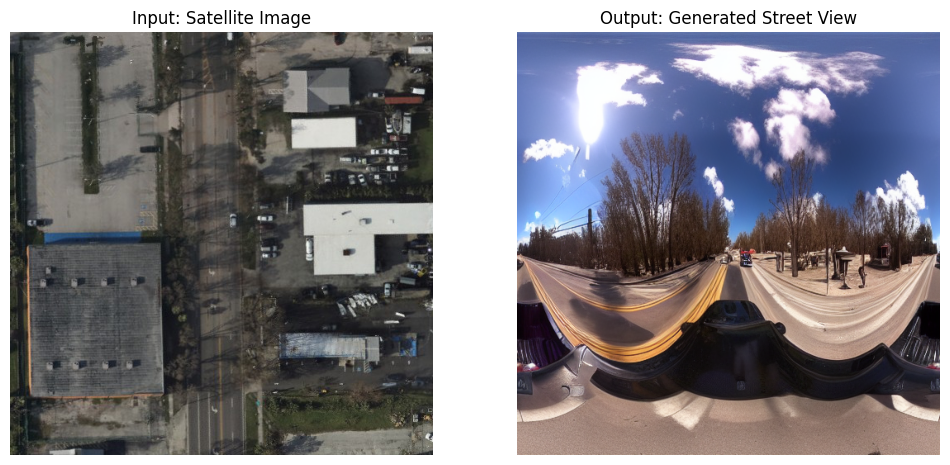

In [6]:
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

# ==========================================
# 1. 设置路径
# ==========================================
# 我们加载最后一个 Epoch 的模型，理论上效果最好
CHECKPOINT_PATH = "/content/drive/MyDrive/sat2street_model/checkpoint-epoch-5"
# 图片数据路径
IMAGE_DIR = "/content/sat2street_data/images"

def test_model():
    print(f"🚀 正在加载训练好的模型: {CHECKPOINT_PATH} ...")

    # 1. 加载组件
    # 注意：这里加载的是你训练的 ControlNet 部分
    controlnet = ControlNetModel.from_pretrained(CHECKPOINT_PATH, torch_dtype=torch.float16)

    # 加载底模 (SD v1.5) 并把你的 ControlNet 插进去
    pipe = StableDiffusionControlNetPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        controlnet=controlnet,
        torch_dtype=torch.float16,
        safety_checker=None
    ).to("cuda")

    # 使用 UniPC 采样器加速推理 (生成更快)
    pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
    pipe.enable_model_cpu_offload() # 节省显存

    # 2. 随机找一张卫星图测试
    all_files = os.listdir(IMAGE_DIR)
    sat_files = [f for f in all_files if "sat" in f] # 筛选出卫星图

    if not sat_files:
        print("❌ 找不到测试图片！")
        return

    # 随机选一张
    test_file = random.choice(sat_files)
    sat_path = os.path.join(IMAGE_DIR, test_file)

    # 读取图片
    sat_image = Image.open(sat_path).convert("RGB").resize((512, 512))

    # 3. 开始生成
    print(f"🎨 正在生成对应街景 (输入: {test_file})...")

    # 提示词 (Prompt): 描述你想要的样子
    prompt = "street view photography, realistic, ground level view, high quality, 4k, urban area, clear sky"
    # 负面提示词 (Negative Prompt): 你不想要的样子
    n_prompt = "low quality, blurry, distorted, satellite view, aerial view, map, watermark"

    output_image = pipe(
        prompt,
        negative_prompt=n_prompt,
        image=sat_image,
        num_inference_steps=20,     # 步数
        controlnet_conditioning_scale=1.0, # 控制力度 (1.0 = 强力控制)
        guidance_scale=7.5
    ).images[0]

    # 4. 展示结果对比
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(sat_image)
    ax[0].set_title("Input: Satellite Image")
    ax[0].axis("off")

    ax[1].imshow(output_image)
    ax[1].set_title("Output: Generated Street View")
    ax[1].axis("off")

    plt.show()

# 运行测试
test_model()